# Notebook imports and Packages

In [87]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1
$f(x)=x^2+x+1$

In [3]:
def f(x):
    return x**2+x+1


In [4]:
#Make Data
x_1=np.linspace(start =-3, stop=3, num=500)

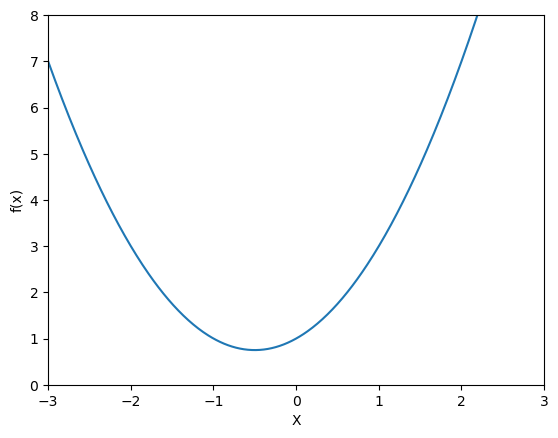

In [5]:
# plot
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X')
plt.ylabel('f(x)')
plt.plot(x_1,f(x_1))
plt.show()

In [6]:
# Slopes and Derivatives
def df(x):
    return 2*x+1

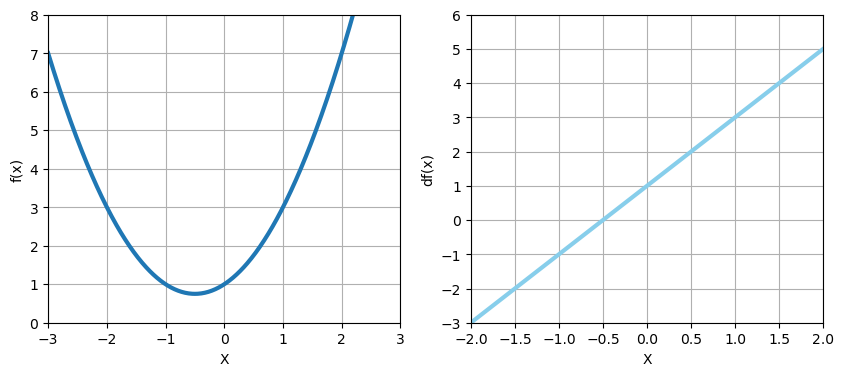

In [7]:
# plot
plt.figure(figsize=[10,4])

#chart 1
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X')
plt.grid()
plt.ylabel('f(x)')
plt.plot(x_1,f(x_1),linewidth=3)

#chart 2
plt.subplot(1,2,2)
plt.plot(x_1,df(x_1),color='skyblue',linewidth=3)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-3,6])
plt.xlabel('X')
plt.ylabel('df(x)')
plt.show()

In [8]:
#Gradient Descent
new_x=3
x=0
previous_x=0
step_multiplier=0.2
x_list=[new_x]
slope_list=[df(new_x)]
while df(new_x) >=0.00001:
    x+=1
    previous_x=new_x
    gradient=df(new_x)
    new_x=previous_x-step_multiplier*gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    
print('The loop ran ',x,' number of times')    
print('Local minimum occurs at ',round(new_x,5))
print('Slope or df(x) value at this point is: ',round(df(new_x),10))
print('The point at which the local minima occurs is X: ',round(new_x,3))
print('f(x) value or the cost at this point is: ',round(f(new_x),10))   

The loop ran  27  number of times
Local minimum occurs at  -0.5
Slope or df(x) value at this point is:  7.1644e-06
The point at which the local minima occurs is X:  -0.5
f(x) value or the cost at this point is:  0.75


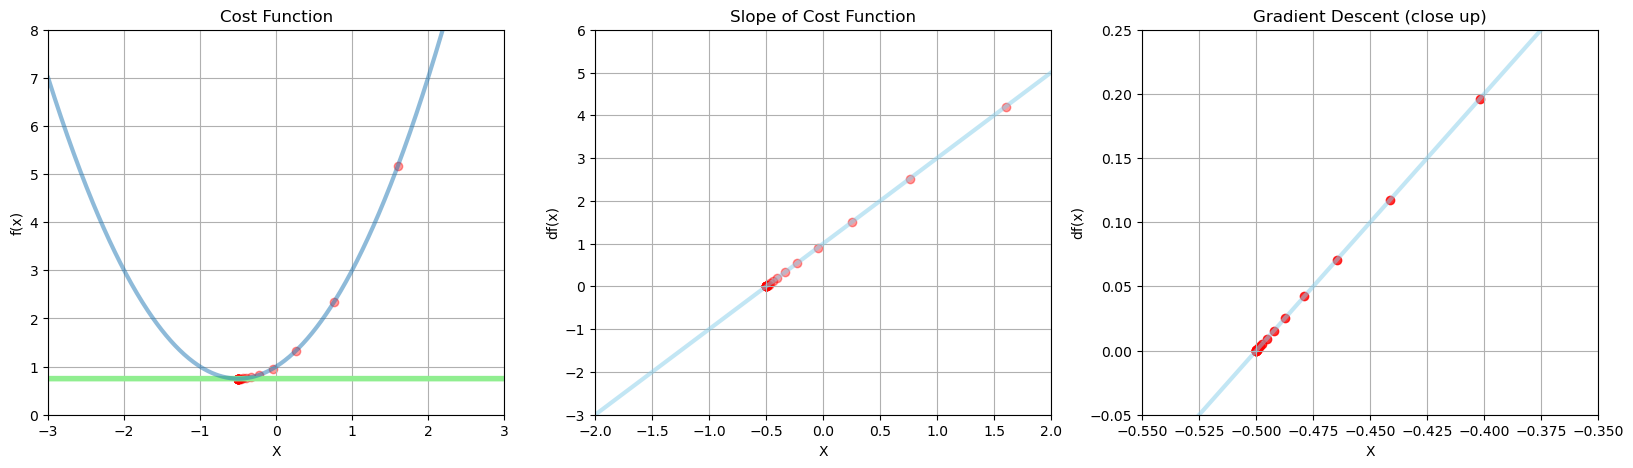

In [9]:
# super-impose the scatter plt
plt.figure(figsize=[20,5])

#chart 1
plt.subplot(1,3,1)
plt.title('Cost Function')
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X')
plt.grid()
plt.ylabel('f(x)')
plt.axline((-0.4999957090124856, 0.75), slope=8.582e-06, linewidth=4, color='lightgreen')
plt.scatter(-0.4999957090124856,0.75,color='orange')
values=np.array(x_list)
plt.scatter(x_list,f(values),color='r',alpha=0.4)
plt.plot(x_1,f(x_1),linewidth=3,alpha=0.5)

#chart 2
plt.subplot(1,3,2)
plt.title('Slope of Cost Function')
plt.plot(x_1,df(x_1),color='skyblue',linewidth=3,alpha=0.5)
plt.scatter(x_list,slope_list,color='r',alpha=0.4)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-3,6])
plt.xlabel('X')
plt.ylabel('df(x)')

#chart 3 (close up)
plt.subplot(1,3,3)
plt.title('Gradient Descent (close up)')
plt.plot(x_1,df(x_1),color='skyblue',linewidth=3,alpha=0.5)
plt.scatter(x_list,slope_list,color='r',alpha=0.8)
plt.grid()
plt.xlim(-0.55, -0.35)
plt.ylim(-0.05, 0.25)
plt.xlabel('X')
plt.ylabel('df(x)')
plt.show()

## Example 2 - Multiple minima vs Initial Guess and Advanced Functions
### $$g(x) = x^4 - 4x^2 + 5$$

In [10]:
#Make the data
x_2 =np.linspace(-2,2,1000)
#functions
def g(x):
    return(x**4-4*x**2+5)
def dg(x):
    return 4*x**3-8*x


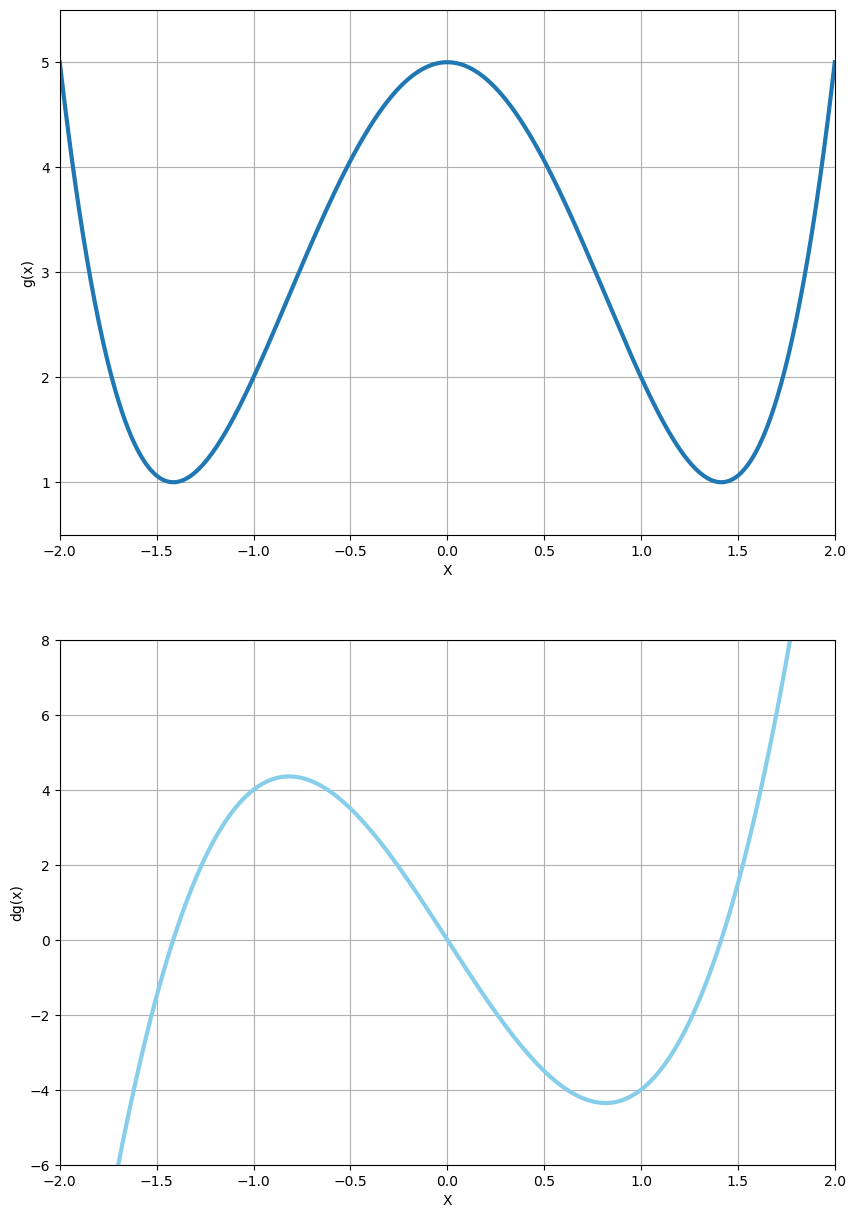

In [11]:
# plot
plt.figure(figsize=[10,15])

#chart 1
plt.subplot(2,1,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X')
plt.grid()
plt.ylabel('g(x)')
plt.plot(x_2,g(x_2),linewidth=3)

#chart 2
plt.subplot(2,1,2)
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=3)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X')
plt.ylabel('dg(x)')
plt.show()

### Gradient Descent as a Python Function

In [12]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, 
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [13]:
local_min, list_x, deriv_list=gradient_descent(dg, -0.1)
print('Local Min occurs at: ',local_min)
print('Number of Steps:',len(list_x))

Local Min occurs at:  -1.4120887490901561
Number of Steps: 34


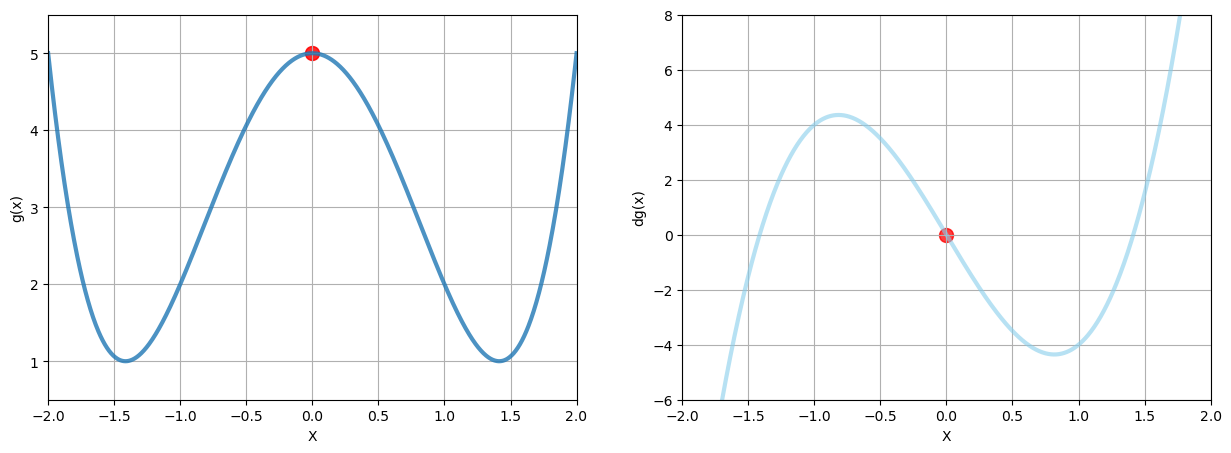

In [14]:
#Calling gradient descent function
local_min, list_x, deriv_list=gradient_descent(dg, 0)

#Plot
plt.figure(figsize=[15,5])

#chart 1
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X')
plt.grid()
plt.ylabel('g(x)')
plt.plot(x_2,g(x_2),linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.6)

#chart 2
plt.subplot(1,2,2)
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=3,alpha=0.6)
plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.5)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X')
plt.ylabel('dg(x)')
plt.show()

## Example 3 - Divergence, Overflow and Python Tuples
### $$h(x)= x^5 - 2x^4+2$$

In [15]:
#Make data
x_3= np.linspace(start=-2.5,stop=2.5,num=1000)

def h(x):
    return x**5-2*x**4+2
def dh(x):
    return 5*x**4-8*x**3

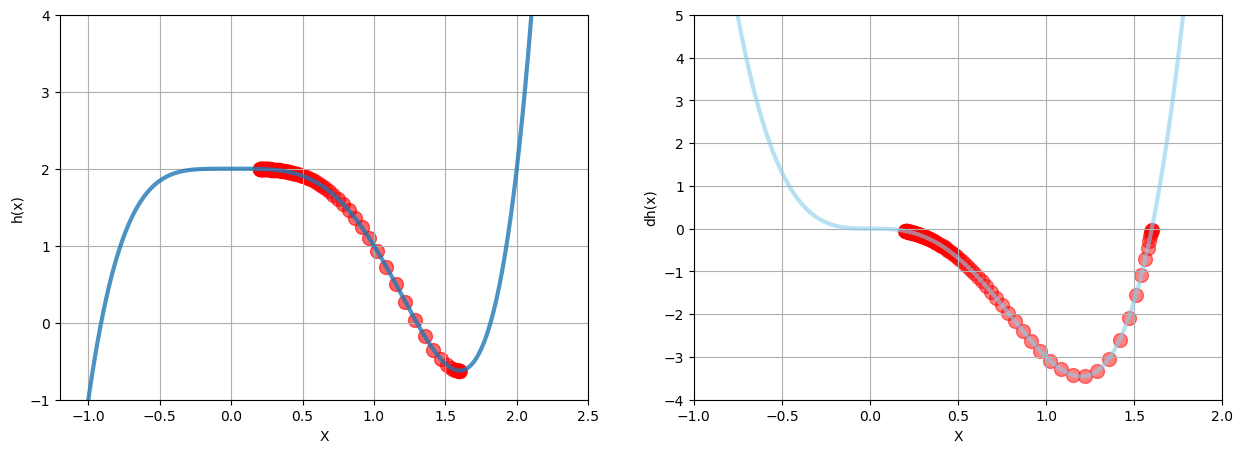

Local min: 1.5989534547394717
Cost at min: -0.6214287992331258
Number of steps: 117


In [16]:
#Calling gradient descent function
local_min, list_x, deriv_list=gradient_descent(derivative_func=dh, initial_guess=0.2)

#Plot
plt.figure(figsize=[15,5])

#chart 1
plt.subplot(1,2,1)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.xlabel('X')
plt.grid()
plt.ylabel('h(x)')
plt.plot(x_3,h(x_3),linewidth=3,alpha=0.8)
plt.scatter(list_x,h(np.array(list_x)),color='red',s=100,alpha=0.6)

#chart 2
plt.subplot(1,2,2)
plt.plot(x_3,dh(x_3),color='skyblue',linewidth=3,alpha=0.6)
plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.5)
plt.grid()
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.xlabel('X')
plt.ylabel('dh(x)')
plt.show()

print('Local min:',local_min)
print('Cost at min:',h(local_min))
print('Number of steps:',len(list_x))

In [17]:
import sys
sys.version
sys.float_info.max

1.7976931348623157e+308

# The Learning Rate $\alpha$

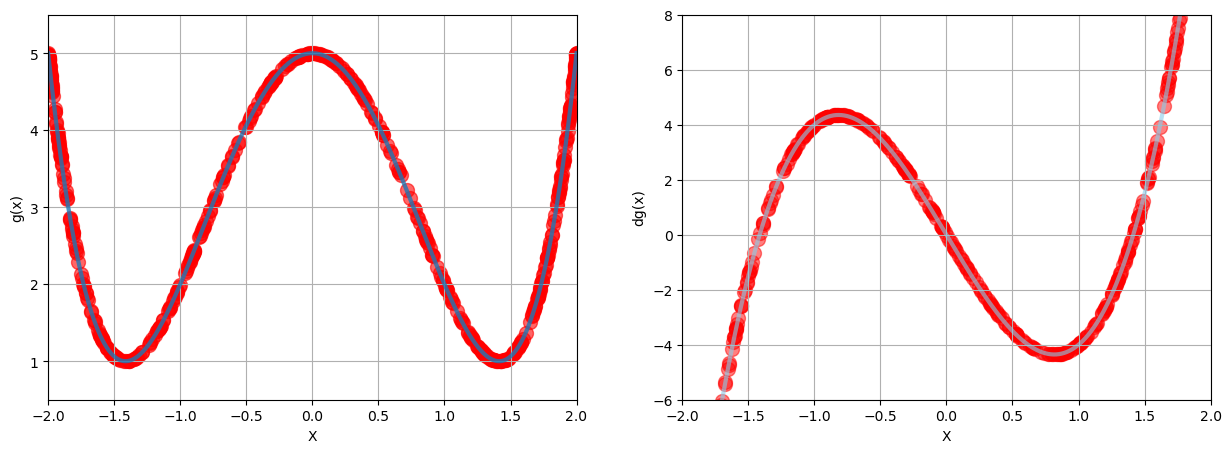

Number of steps: 501


In [18]:
#Calling gradient descent function
local_min, list_x, deriv_list=gradient_descent(derivative_func=dg,
                                               initial_guess=1.9,
                                               multiplier=0.25,max_iter=500)

#Plot
plt.figure(figsize=[15,5])

#chart 1
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X')
plt.grid()
plt.ylabel('g(x)')
plt.plot(x_2,g(x_2),linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.6)

#chart 2
plt.subplot(1,2,2)
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=3,alpha=0.6)
plt.scatter(list_x,deriv_list,color='red',s=100,alpha=0.5)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X')
plt.ylabel('dg(x)')
plt.show()

print('Number of steps:',len(list_x))

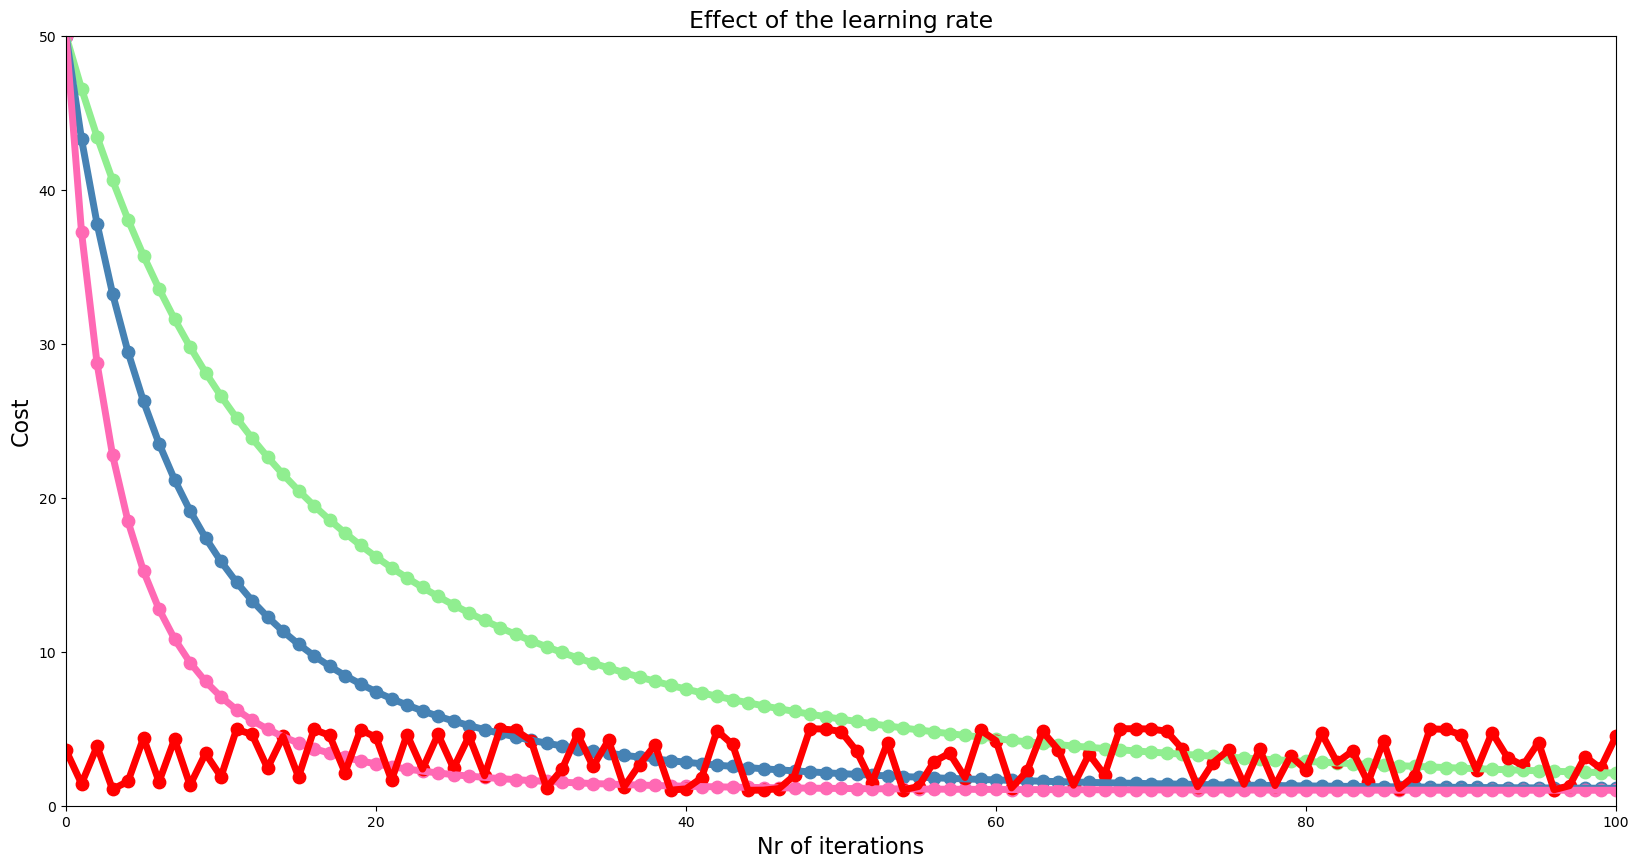

In [19]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.25, precision=0.0001, max_iter=n)


# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

# Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)


plt.show()

## Example 4 - Data Viz with 3D Charts
### Minimise $$f(x,y)=\frac{1}{3^{-x^2-y^2}+1}$$

In [20]:
def f(x,y):
    r=3**(-x**2-y**2)
    return 1/(r+1)

In [21]:
def df(x,y):
    return 1

In [22]:
# Making data, x and y
x_4=np.linspace(-2,2,num=200)
y_4=np.linspace(-2,2,num=200)

#2D array

x_4 ,y_4=np.meshgrid(x_4 ,y_4)

C:\Users\Kiran Bharadwaj HD\AppData\Local\Temp\ipykernel_864\823459730.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


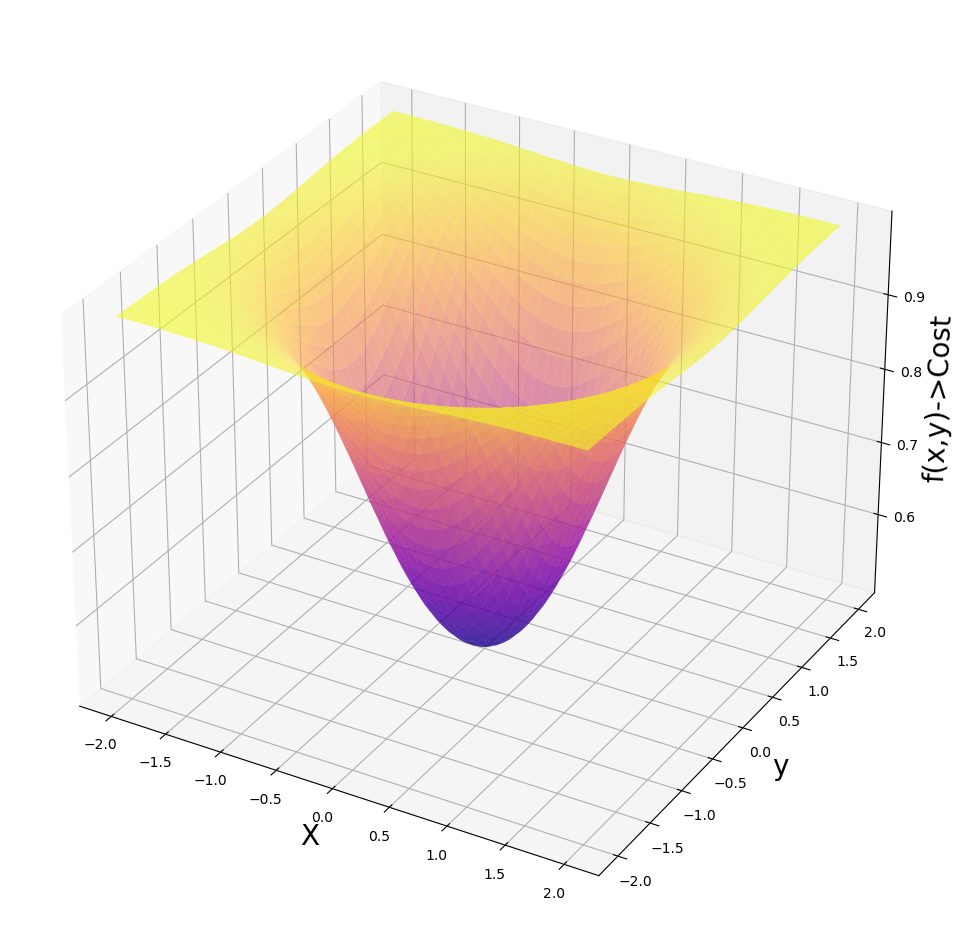

In [23]:
# Generating 3D plot

fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('f(x,y)->Cost', fontsize=20)
ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap=cm.plasma,alpha=0.6)

plt.show()

## Partial Derivatives and Sybolic Derivations

### $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

### $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

In [24]:
a, b=symbols('x, y')
print('Our Cost-Function f(x,y) is:',f(a,b))
print('Partial Dirivatives w.r.t. x is:',diff(f(a,b),a))
print('Value of f(x,y) at x=1.8 and y=1.0 is:',f(a,b).evalf(subs={a:1.8,b:1.0}))#Python Dictionary (key-value pair)
print('Value of df(x,y) w.r.t x at x=1.8 and y=1.0 is:',diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))
print('Value of df(x,y) w.r.t y at x=1.8 and y=1.0 is:',diff(f(a,b),b).evalf(subs={a:1.8,b:1.0}))

Our Cost-Function f(x,y) is: 1/(3**(-x**2 - y**2) + 1)
Partial Dirivatives w.r.t. x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 and y=1.0 is: 0.990604794032582
Value of df(x,y) w.r.t x at x=1.8 and y=1.0 is: 0.0368089716197505
Value of df(x,y) w.r.t y at x=1.8 and y=1.0 is: 0.0204494286776392


## Batch Gradient Descent with SymPy (Multi-Variable Derivative)

In [25]:
#Setup
multiplier =0.1
max_iter=500
params=np.array([1.8,1.0])#initial guess

for n in range(max_iter):
    gradient_x=diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y=diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params=params-multiplier*gradients
#Results
print('Values in gradient array',gradients)
print('Minimum occurs at x value of:',params[0])
print('Minimum occurs at y value of:',params[1])
print('The cost is:',f(params[0],params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832e-11
Minimum occurs at y value of: 1.92132555492129e-11
The cost is: 0.500000000000000


In [26]:
#partial derivatives functions
def fpx(x,y):
    return 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
def fpy(x,y):
    return 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2

In [27]:
#FASTER..... than sympy as each time the partial derivative is calculated and then substituted
multiplier =0.1
max_iter=500
params=np.array([1.8,1.0])#initial guess

for n in range(max_iter):
    gradient_x=fpx(params[0],params[1])
    gradient_y=fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params=params-multiplier*gradients
#Results
print('Values in gradient array',gradients)
print('Minimum occurs at x value of:',params[0])
print('Minimum occurs at y value of:',params[1])
print('The cost is:',f(params[0],params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


## Graphing 3D Gradient Descent & Advanced Numpy Arrays

In [51]:
#setup
multiplier =0.1
max_iter=500
params=np.array([1.8,1.0])#initial guess
values_array=params.reshape(1,2)#2D array
for n in range(max_iter):
    gradient_x=fpx(params[0],params[1])
    gradient_y=fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params=params-multiplier*gradients
    #values_array =np.append(values_array, params.reshape(1,2),axis=0)
    values_array=np.concatenate((values_array, params.reshape(1,2)),axis=0)
#Results
print('Values in gradient array',gradients)
print('Minimum occurs at x value of:',params[0])
print('Minimum occurs at y value of:',params[1])
print('The cost is:',f(params[0],params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


C:\Users\Kiran Bharadwaj HD\AppData\Local\Temp\ipykernel_864\2447555287.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


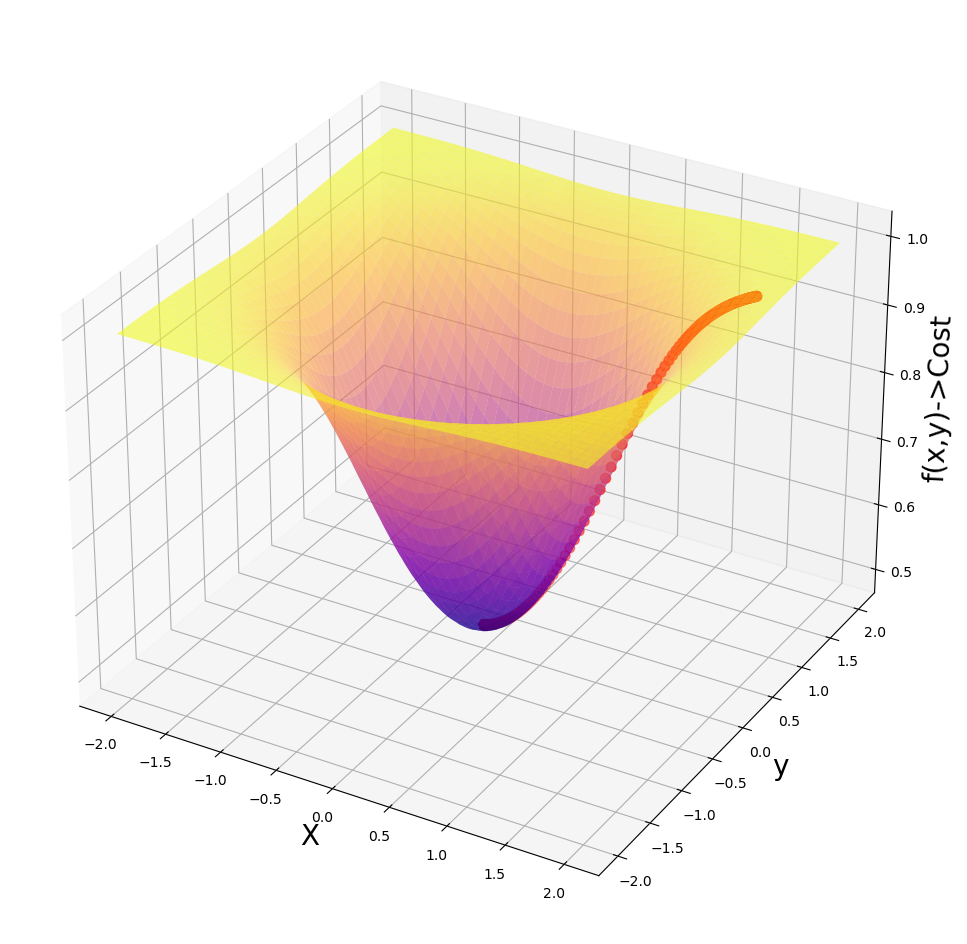

In [52]:
# Generating 3D plot

fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('f(x,y)->Cost', fontsize=20)
ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap=cm.plasma,alpha=0.6)
ax.scatter(values_array[:,0], values_array[:,1], 
           f(values_array[:,0], values_array[:,1]),s=50,color='r')
plt.show()

# MSE - Mean Squared Error & Working with Data
### $$ RSS=\sum_{i=1}^{n}\big(y^{(i)}-h_\theta x^{(i)}\big)^2$$
### $$ MSE=\frac{1}{n} \sum_{i=1}^{n}\big(y^{(i)}-h_\theta x^{(i)}\big)^2$$
### $$ MSE=\frac{1}{n} \sum_{i=1}^{n}\big(y-\hat{y}\big)^2$$

In [57]:
# Make sample data
x_5=np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y_5=np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)

In [62]:
#Quick Linear Regression
regr = LinearRegression()
regr.fit(x_5,y_5)
print('Theta 0: ',regr.intercept_[0])
print('Theta 1: ',regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


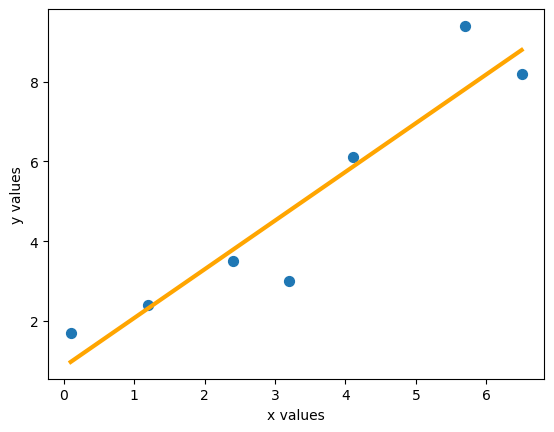

In [70]:
plt.scatter(x_5,y_5,s=50)
plt.plot(x_5,regr.predict(x_5),color='orange',linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [71]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5

In [75]:
y_hat

array([[0.96980779],
       [2.31480691],
       [3.78207866],
       [4.76025983],
       [5.86071365],
       [7.81707599],
       [8.79525716]])

In [76]:
y_5

array([[1.7],
       [2.4],
       [3.5],
       [3. ],
       [6.1],
       [9.4],
       [8.2]])

In [82]:
def mse(y, y_hat):
    return(1/y.size)*sum((y-y_hat)**2)

In [83]:
print(mse(y_5,y_hat))

[0.94796558]


In [89]:
print(mean_squared_error(y_5,regr.predict(x_5)))

0.9479655759794577


# 3D Plot for the MSE Cost Function
## Make data for the thetas

In [108]:
nr_thetas =200
th_0 = np.linspace(start=-1,stop=3,num=nr_thetas)
th_1 = np.linspace(start=-1,stop=3,num=nr_thetas)
plot_t0 , plot_t1= np.meshgrid(th_0,th_1)

In [109]:
plot_cost=np.zeros((nr_thetas,nr_thetas))
plot_cost
##print(plot_t0)
##print(plot_t1)

[[-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 ...
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]]
[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.9798995  -0.9798995  -0.9798995  ... -0.9798995  -0.9798995
  -0.9798995 ]
 [-0.95979899 -0.95979899 -0.95979899 ... -0.95979899 -0.95979899
  -0.95979899]
 ...
 [ 2.95979899  2.95979899  2.95979899 ...  2.95979899  2.95979899
   2.95979899]
 [ 2.9798995   2.9798995   2.9798995  ...  2.9798995   2.9798995
   2.9798995 ]
 [ 3.          3.          3.         ...  3.          3.
   3.        ]]


In [112]:
## Nested loop
for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[i][j])
        y_hat=plot_t0[i][j]+plot_t1[i][j]*x_5
        plot_cost[i][j]=mse(y_5,y_hat)
plot_cost.shape

(200, 200)

C:\Users\Kiran Bharadwaj HD\AppData\Local\Temp\ipykernel_864\3668475501.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


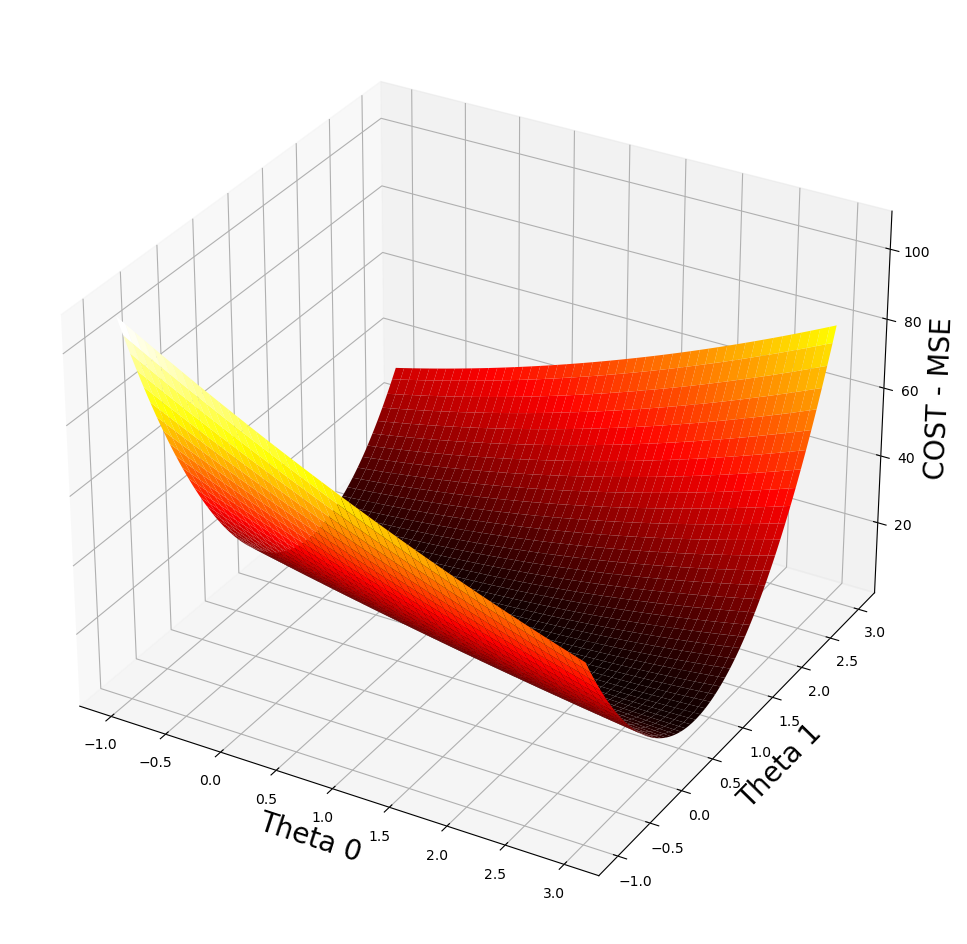

In [113]:
#Plotting MSE
fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('COST - MSE', fontsize=20)
ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.hot)
plt.show()

In [120]:
print('min value of plot_cost',plot_cost.min())
ij_min=np.unravel_index(indices=plot_cost.argmin(),shape=plot_cost.shape)
print('Min occurs at (i,j)', ij_min)


min value of plot_cost 0.9483826526747163
Min occurs at (i,j) (111, 91)


# Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$
## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

### MSE & Gradient Descent

In [124]:
# x values, y values, array of theta parameters(theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n=y.size
    
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    return np.array([theta0_slope[0],theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    #return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [132]:
multiplier =0.01
thetas =np.array([2.9,2.9])

plot_vals= thetas.reshape(1,2)
mse_vals=mse(y_5, thetas[0]+thetas[1]*x_5)
for i in range(1000):
    thetas= thetas - multiplier*grad(x_5,y_5,thetas)
    plot_vals=np.concatenate((plot_vals,thetas.reshape(1, 2)),axis=0)
    mse_vals=np.append(arr=mse_vals,values=mse(y_5, thetas[0]+thetas[1]*x_5))
    
#RESULTS 
print('Min occurs at Theta 0:',thetas[0])
print('Min occurs at Theta 1:',thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


C:\Users\Kiran Bharadwaj HD\AppData\Local\Temp\ipykernel_864\1185235084.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


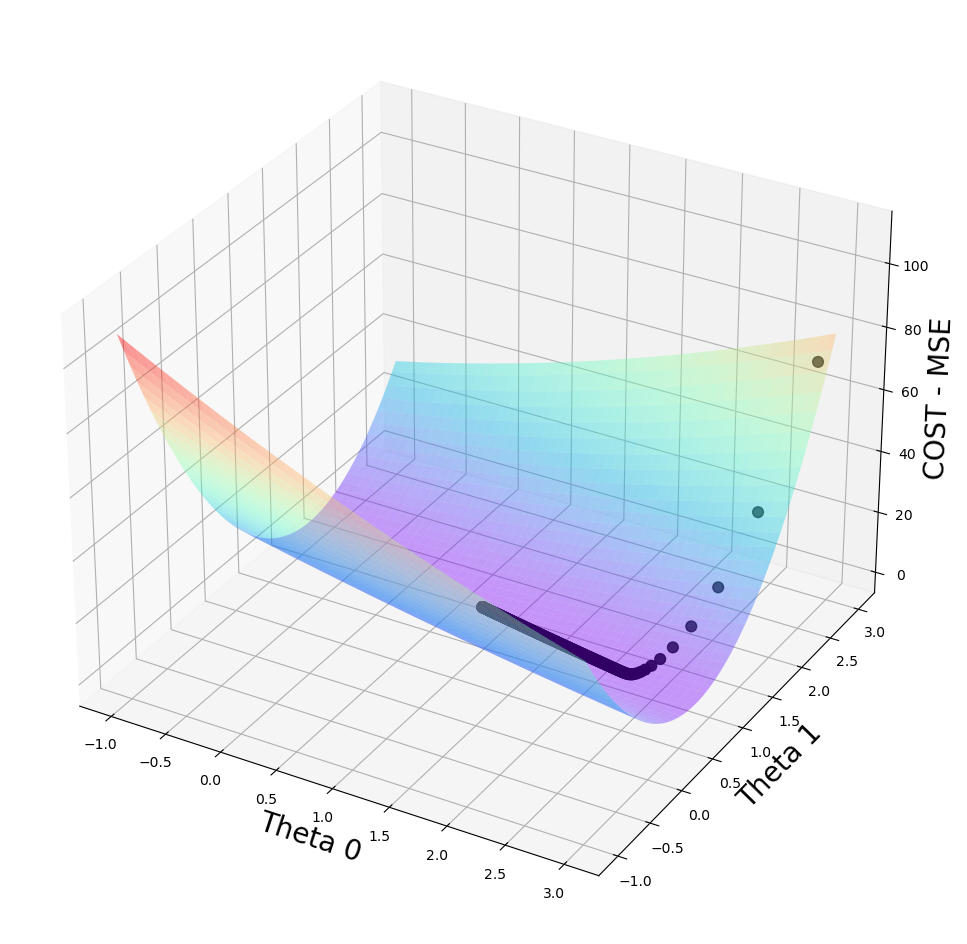

In [133]:
#Plotting MSE
fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('COST - MSE', fontsize=20)
ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.rainbow, alpha=0.4)
ax.scatter(plot_vals[:,0],plot_vals[:,1],mse_vals,s=60, color='black')
plt.show()

##### KIRAN BHARADWAJ H D